In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cs_data_cleansed.csv')
df.head()

,time,class_capacity,days_before,attendance,age,new_students,over_6_month,Day__Fri,Day__Mon,Day__Sat,Day__Sun,Day__Thu,Day__Tue,Day__Wed,Class__Aqua,Class__Cycling,Class__HIIT,Class__Strength,Class__Yoga
0,0,15,1,8,1,6,4,0,0,0,0,0,0,1,0,0,0,0,1
1,1,15,3,8,1,7,8,0,0,0,1,0,0,0,1,0,0,0,0
2,0,15,5,10,0,8,7,0,1,0,0,0,0,0,1,0,0,0,0
3,1,25,3,18,0,7,9,0,0,0,1,0,0,0,0,0,0,1,0
4,0,15,5,10,1,5,7,0,1,0,0,0,0,0,0,0,0,0,1


## 4.Modelling

#### 4.1 - Normalization / Standardization

In [3]:
df.describe()

,time,class_capacity,days_before,attendance,age,new_students,over_6_month,Day__Fri,Day__Mon,Day__Sat,Day__Sun,Day__Thu,Day__Tue,Day__Wed,Class__Aqua,Class__Cycling,Class__HIIT,Class__Strength,Class__Yoga
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,0.518373,17.506562,2.547244,9.519685,0.912073,5.909449,7.555118,0.123360,0.120735,0.129921,0.150919,0.165354,0.157480,0.152231,0.209974,0.170604,0.179790,0.212598,0.227034
std,0.499991,4.336755,1.355768,3.841164,0.612087,1.666218,1.883668,0.329065,0.326033,0.336438,0.358205,0.371744,0.364492,0.359481,0.407557,0.376409,0.384265,0.409415,0.419190
min,0.000000,15.000000,1.000000,4.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,1.000000,7.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,15.000000,2.000000,9.000000,1.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,22.500000,4.000000,11.000000,1.000000,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,25.000000,5.000000,21.000000,2.000000,9.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will not standardize/normalize our data if, we look closely the max of all our features is 25, while the min is 0 for binary variables.

This difference of magnitude don't justify the necessity to normalize so we will start modelling without normalization/standardization.

#### 4.2 - Modelling

We will test the following models,

- RandomForestRegressor.
- DecisionTreeRegressor.
- SGDRegressor - This model will probably not generalize well because we have a small dataset.
- Lasso.
- Ridge.

First we will evaluate the models with just the training dataset, we will choose the most promising to fine tune the hyperparameters.

##### 4.2.1 - Train & Test Split

In [4]:
df.head()

,time,class_capacity,days_before,attendance,age,new_students,over_6_month,Day__Fri,Day__Mon,Day__Sat,Day__Sun,Day__Thu,Day__Tue,Day__Wed,Class__Aqua,Class__Cycling,Class__HIIT,Class__Strength,Class__Yoga
0,0,15,1,8,1,6,4,0,0,0,0,0,0,1,0,0,0,0,1
1,1,15,3,8,1,7,8,0,0,0,1,0,0,0,1,0,0,0,0
2,0,15,5,10,0,8,7,0,1,0,0,0,0,0,1,0,0,0,0
3,1,25,3,18,0,7,9,0,0,0,1,0,0,0,0,0,0,1,0
4,0,15,5,10,1,5,7,0,1,0,0,0,0,0,0,0,0,0,1


First divide the dataset into features X and target Y.

In [5]:
X = df.drop('attendance', axis = 1)
y = df['attendance']

Divide the dataset into Train & Test datasets.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

##### 4.2.2 - Models Evaluation 

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict

Cross validation will be used to prevent overfitting. We will apply cross validation first in the train (Yes, we will save 20% of our data) to predict over it as soon as we have the model fine tuned.

In [8]:
'''Models'''

#Definition of models to test

models = [
          ('RFRegressor', RandomForestRegressor()), 
          ('DTreeRegressor', DecisionTreeRegressor()),
          ('SGD', SGDRegressor()),
          ('Lasso', Lasso()), 
          ('Ridge', Ridge()),
        ]

'''Accuracy'''

#Metric to evaluate

scoring_metrics = ['neg_mean_squared_error','r2']

#Initialize a dataframe to append the RMSE and STD for each model RMSE

dict_metrics = pd.DataFrame(index = ['R*2','RMSE_mean','RMSE_standard_deviation'])

#Cross validation will be use with kfold to divide the train datasets into different folds

for model_name, model in models:
    #Initiate KFold
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
    #Perform a cross validate 
    cv_scores = cross_validate(model, X_train, y_train, cv = kfold, scoring = scoring_metrics)
    
    #Calculate the RMSE - Mean Square Deviation
    model_rmse = np.sqrt(-cv_scores['test_neg_mean_squared_error'])
    
    dict_metrics[model_name] = [np.mean(cv_scores['test_r2']), np.mean(model_rmse), np.std(model_rmse)]
    
dict_metrics

,RFRegressor,DTreeRegressor,SGD,Lasso,Ridge
R*2,0.627719,0.328284,0.428105,0.610734,0.701810
RMSE_mean,2.320637,3.127939,2.733040,2.383264,2.076217
RMSE_standard_deviation,0.198041,0.209275,0.905008,0.099409,0.163350


Analysing the table above we conclude the following,

- SGD - As expected it was the model with the worst RMSE, the smaller dataset didn't allow to generalize well, r^2 tells that the the predictor variables only can explain 48%.

- DTreeRegressor - Had a decent RMSE but not sufficient to go the next step.

- Lasso - Promising Model with the third best RMSE, however it presented best STD meaning that the 5 different kfold_models were very precise.

- RFRegressor - Promising RMSE, however having the best RMSE standard deviation. However it will pass to the next step.

- Ridge - Best Model, with a low std too.

So Lasso, Ridge and RFRegressor will undergo a hyperparameter tuning.

##### 4.2.3 - Hyperparameter Tuning - RFRegressor, Lasso & Ridge

The first to do is initialize a dataframe to append the Test RMSE of our hyper tuned models.

In [9]:
RMSE_test_dataset = pd.DataFrame(index = ['RMSE','R*2'])

##### 4.2.3.1 - RandomForestRegressor

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
              "max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]
            }


forest_reg = RandomForestRegressor()

gridsearch_forest = GridSearchCV(forest_reg,param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

gridsearch_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 8, 16]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
gridsearch_forest.best_params_

{'max_depth': 8, 'max_features': 8, 'min_samples_split': 16}

With the best params obtain from GridSearch, we run again RandomForestRegressor and calculate the RMSE for our train dataset.

In [25]:
forest_reg = RandomForestRegressor(max_depth = 8, max_features = 8, min_samples_split = 16)

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

forest_rmse = np.sqrt(-forest_scores)

print(f'The score {forest_rmse}')
print(f'The mean is {np.mean(forest_rmse)}')
print(f'The standard deviation is {np.std(forest_rmse)}')

The score [2.108622   2.24604501 1.93406657 2.2053702  2.08193622]
The mean is 2.115207997858338
The standard deviation is 0.10882108984676399


If we compare the RMSE of our previous model with hyperparameter tuned, we achieve a best RMSE, meaning that we were able to optimize the model.

Let's now evaluate the RMSE for our test dataset, that hasn't been touched yet.

In [12]:
#Initiating the the cross val
y_pred = gridsearch_forest.predict(X_test)

RMSE_test_dataset['RandomForestRegressor'] = [np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)]
RMSE_test_dataset

,RandomForestRegressor
RMSE,1.919407
R*2,0.749976


RSME of our test dataset is at the same magnitude of our Train dataset, is even lower. R*2 of 70% is good too, 70% of the prediction depends on our predictor variables.

##### 4.2.3.2 - Ridge

The only hyperparameter to be fine tuned in Ridge is alpha.

Alpha in Ridge regulates the shrinkage of the features in our dataset. Higher the alpha bigger the shrinkage of our features.

So we will initiate a model and loop over alpha from 0.01 to 1000, and then we will filter for the best score and find the best alpha for our models.

In [13]:
#Alphas will be between 0.01 and 1000
alphas = np.arange(0.01,1000, 1)
score_ridge = []
alpha_score = []

#Looping over the alphas considered
for alpha in alphas:
    #Initiate the Ridge
    ridge = Ridge(alpha = alpha)
    #Fit the data
    ridge.fit(X_train,y_train)
    
    #Get the R-Squared
    score = ridge.score(X_test, y_test)
    score_ridge.append(score)
    alpha_score.append(alpha)

#Finding the position of the max score ridge in the array
score_ridge.index(np.max(score_ridge))

#Find the alpha in the alpha list
alpha_score[score_ridge.index(np.max(score_ridge))]

51.01

We obtain a alpha of 51, we will again redo the cross validation with the best alpha.

In [14]:
ridge_regress = Ridge(alpha_score[score_ridge.index(np.max(score_ridge))])

ridge_scores = cross_val_score(ridge_regress, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

ridge_rmse = np.sqrt(-ridge_scores)

print(f'The score {ridge_rmse}')
print(f'The mean is {np.mean(ridge_rmse)}')
print(f'The standard deviation is {np.std(ridge_rmse)}')

The score [2.10180562 2.26273253 1.96801479 2.12799001 2.00484743]
The mean is 2.0930780762831427
The standard deviation is 0.10344381765315203


In [15]:
ridge_regress.fit(X_train, y_train)

y_pred_ridge = ridge_regress.predict(X_test)

RMSE_test_dataset['Ridge'] = [np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)]
RMSE_test_dataset

,RandomForestRegressor,Ridge
RMSE,1.919407,1.957655
R*2,0.749976,0.739913


RMSE is very good and R*2 is above 70%, even better than RFRegressor.

##### 4.2.3.3 - Lasso

In [16]:
#Alphas will be between 0.01 and 1000
alphas = np.arange(0.01,1000, 1)
score_lasso = []
alpha_score = []

for alpha in alphas:
    #Initiate Lasso
    lasso = Lasso(alpha = alpha)
    #Fit the data
    lasso.fit(X_train,y_train)
    
    #Get the R-Squared
    score = lasso.score(X_test, y_test)
    score_lasso.append(score)
    alpha_score.append(alpha)

#Finding the position of the max score lasso in the array
score_lasso.index(np.max(score_lasso))

#Find the alpha in the alpha list
alpha_score[score_lasso.index(np.max(score_lasso))]

0.01

In [17]:
lasso_regress = Lasso(alpha = 0.01)

lasso_scores = cross_val_score(lasso_regress, X, y, scoring = 'neg_mean_squared_error', cv = 5)

lasso_rmse = np.sqrt(-lasso_scores)

print(f'The score {lasso_rmse}')
print(f'The mean is {np.mean(lasso_rmse)}')
print(f'The standard deviation is {np.std(lasso_rmse)}')

The score [2.02689439 2.20070063 1.92024635 2.15680265 1.98734921]
The mean is 2.0583986451512564
The standard deviation is 0.10493788574135574


We were able, this time, to optimize Lasso and reach a better RMSE than before.

In [18]:
lasso_test_scores = cross_val_predict(lasso_regress, X_test, y_test, cv = 5)

np.sqrt(mean_squared_error(y_test, lasso_test_scores))

2.0725884664927228

RMSE of the test dataset has the same magnitude as the train dataset.

In [19]:
lasso_regress.fit(X_train, y_train)

y_pred_lasso = lasso_regress.predict(X_test)

RMSE_test_dataset['Lasso'] = [np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)]
RMSE_test_dataset

,RandomForestRegressor,Ridge,Lasso
RMSE,1.919407,1.957655,1.964382
R*2,0.749976,0.739913,0.738122


RMSE & R2 in the same magnitude as the other models.

We will conclude later, however we already found a winner,

- 1. Ridge
- 2. RFRegressor
- 3. Lasso

Nevertheless this three models present as good predictors for attendance.

We will follow with RandomForestRegressor.

##### 4.2.4 - Feature Importance - RandomForestRegressor

Before we conclude about the models, let's plot the feature importance for our RandomForest Regression, to understand which features contributes more and those that contribute less.

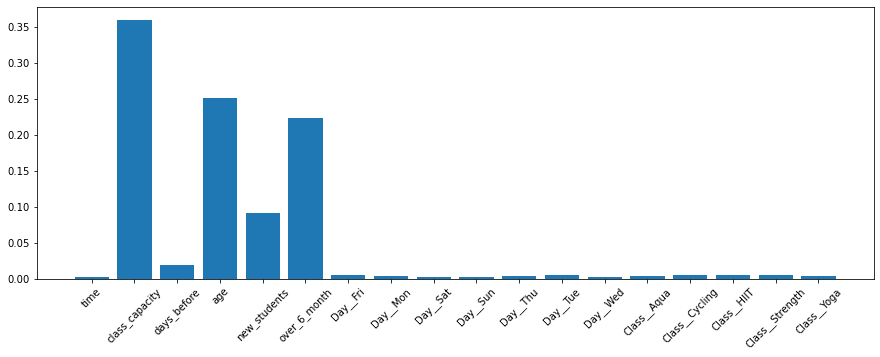

In [20]:
#Initiate the model
forest_reg = RandomForestRegressor(max_depth = 8, max_features = 8, min_samples_split = 16)

#Fit the model
forest_reg.fit(X_train, y_train)

columns = list(df.columns)
columns.remove('attendance')

#plot the feature importance
fig, ax = plt.subplots(figsize = (15,5))
plt.bar(columns, forest_reg.feature_importances_)
plt.xticks(rotation=45)
plt.show()

Class capacity, age, and students (both new and over 6 months) are the features that more contributed to predict the attendance to a specific class.

Week day, type of classes, day time are some of the classes that don't contribute or contribute less to our model.

Both Lasso & Coeficients have in general the same coefficients for the predictive model. I want to point out the following things,

- Age is the feature that has more weight in our model. It's negative meaning that greater the age, lower the attendance.

- New students, class capacity and over 6 months have positive coefficients. Follow the feature importance of RF Regressor seen before.

- Friday is a positive weighted coefficient, meaning that is an important day to predict the attendance.

- The same happens with Hiit Class however it's negative coefficient meaning that we should expect a lower attendance when the class is HiiT.

#### 4.3 - Model Evaluation

In [21]:
RMSE_test_dataset

,RandomForestRegressor,Ridge,Lasso
RMSE,1.919407,1.957655,1.964382
R*2,0.749976,0.739913,0.738122


We chose the RMSE & R2 metrics to evaluate the several models that we were studying, Lasso, Ridge & RFRegressor.

These three models were excelent to predict the attendance of the classes, however Ridge was the best one to predict class attendance, and where the independent(predictor) variables can explain more the regression. All the models responded very well to both metrics in study.

At the beggining we made some exploratory data analysis to have any idea of the feature importance for our model. Age, new_students and over 6 month were said as good predictors what was confirm by the models, we suspected that time could be a predictor but we were wrong, when we look to the feature importance or coefficient for our linear regression. In fact age is the best predictor for our model.

Regarding next steps,

- This analysis should be repeated without the noise of the various features that we identified as not important.
- It would be nice if the company supply the time for every class, instead of just AM or PM, could be crucial and a very important feature to our model.